In [1]:
import symforce 
symforce.get_symbolic_api()

'symengine'

In [2]:
symforce.set_symbolic_api('sympy')

In [3]:
symforce.set_log_level('warning')

In [6]:
import symforce.symbolic as sf
from symforce.values import Values
from symforce.notebook_util import display, display_code, display_code_file

In [7]:
inputs = Values(x = sf.Symbol("x"), y = sf.Rot2.symbolic("c"))
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
)

In [8]:
inputs.add(sf.Symbol("f"))


In [10]:
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
  f: f,
)

In [11]:
x, y = sf.symbols("x y")

In [12]:
display(x)

In [13]:
display(y)

In [14]:
expr = x**2 + sf.sin(y)/x**2

In [15]:
inputs["states"] = Values(p=expr)

In [16]:
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
  f: f,
  states:   Values(
    p: x**2 + sin(y)/x**2,
  ),
)

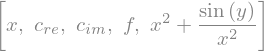

In [17]:
display(inputs.to_storage())

In [18]:
display(inputs.items_recursive())

[('x', x),
 ('y', <Rot2 <C real=c_re, imag=c_im>>),
 ('f', f),
 ('states.p', x**2 + sin(y)/x**2)]

In [20]:
inputs['constants'] = sf.Symbol('a')

In [21]:
display(inputs)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
  f: f,
  states:   Values(
    p: x**2 + sin(y)/x**2,
  ),
  constants: a,
)

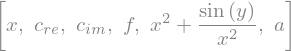

In [22]:
inputs.to_storage()

In [23]:
inputs.keys_recursive()

['x', 'y', 'f', 'states.p', 'constants']

In [24]:
inputs.values_recursive()

[x, <Rot2 <C real=c_re, imag=c_im>>, f, x**2 + sin(y)/x**2, a]

In [25]:
index = inputs.index()

In [26]:
index

OrderedDict([('x',
  IndexEntry(offset=0, storage_dim=1, _module='builtins', _qualname='float', shape=None, item_index=None)),
 ('y',
  IndexEntry(offset=1, storage_dim=2, _module='symforce.geo.rot2', _qualname='Rot2', shape=None, item_index=None)),
 ('f',
  IndexEntry(offset=3, storage_dim=1, _module='builtins', _qualname='float', shape=None, item_index=None)),
 ('states',
  IndexEntry(offset=4, storage_dim=1, _module='symforce.values.values', _qualname='Values', shape=None, item_index=OrderedDict([('p', IndexEntry(offset=0, storage_dim=1, _module='builtins', _qualname='float', shape=None, item_index=None))]))),
 ('constants',
  IndexEntry(offset=5, storage_dim=1, _module='builtins', _qualname='float', shape=None, item_index=None))])

In [27]:
inputs2 = Values.from_storage_index(inputs.to_storage(), index)

In [29]:
assert inputs == inputs2

In [30]:
display(inputs2)

Values(
  x: x,
  y: <Rot2 <C real=c_re, imag=c_im>>,
  f: f,
  states:   Values(
    p: x**2 + sin(y)/x**2,
  ),
  constants: a,
)

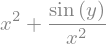

In [31]:
inputs["states.p"]


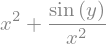

In [32]:
inputs.attr.states.p

In [35]:
with sf.scope("config"):
    c1 = sf.Symbol("c1")

In [36]:
display(c1)

In [37]:
v = Values()

In [38]:
display(v)


Values(
)

In [39]:
v.add(sf.Symbol("X"))

In [44]:
with sf.scope("f1"):
    v.add(sf.Symbol("X"))
    with sf.scope("f2"):
        v.add(sf.Symbol("X"))

display(v)

Values(
  X: X,
  f1:   Values(
    X: f1.X,
    f2:     Values(
      x: f1.f2.x,
      X: f1.f2.X,
    ),
  ),
)

In [45]:
lie_vals = Values()

In [46]:
lie_vals['scalar'] = sf.Symbol("x")

In [47]:
lie_vals['rot3'] = sf.Rot3.symbolic("rot")

In [50]:
sub_lie_vals = Values()
sub_lie_vals["pose3"] = sf.Pose3.symbolic("pose")
sub_lie_vals["vec"] = sf.V3.symbolic("vec")

In [51]:
lie_vals["sub_vals"] = sub_lie_vals

In [52]:
display(lie_vals)

Values(
  scalar: x,
  rot3: <Rot3 <Q xyzw=[rot_x, rot_y, rot_z, rot_w]>>,
  sub_vals:   Values(
    pose3: <Pose3 R=<Rot3 <Q xyzw=[pose.R_x, pose.R_y, pose.R_z, pose.R_w]>>, t=(pose.t0, pose.t1, pose.t2)>,
    vec: Matrix([
[vec0],
[vec1],
[vec2]]),
  ),
)

In [53]:
display(lie_vals.tangent_dim())

In [54]:
display(len(lie_vals.to_tangent()))

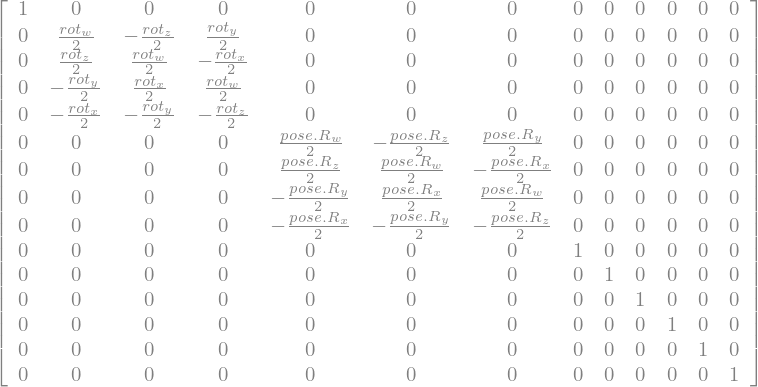

(15, 13)


In [61]:
display(lie_vals.storage_D_tangent())
print(lie_vals.storage_D_tangent().shape)

In [56]:
help(symforce.values.Values.storage_D_tangent)


Help on function storage_D_tangent in module symforce.values.values:

storage_D_tangent(self) -> 'geo.Matrix'
    Returns a matrix with dimensions (storage_dim x tangent_dim) which represents
    the jacobian of the flat storage space of self wrt to the flat tangent space of
    self. The resulting jacobian is a block diagonal matrix, where each block corresponds
    to the storage_D_tangent for a single element or is zero.



In [57]:
display(lie_vals.to_storage())

In [59]:
display(len(lie_vals.to_storage()))

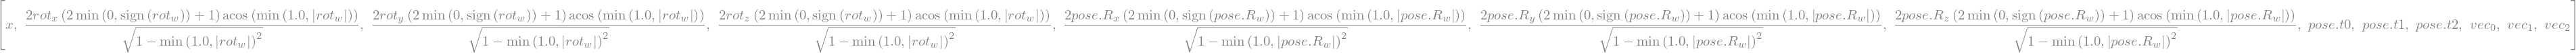

In [62]:
display(lie_vals.to_tangent())

In [63]:
help(symforce.values.Values.to_tangent)

Help on function to_tangent in module symforce.values.values:

to_tangent(self, epsilon: 'sf.Scalar' = 0.0) -> 'T.List[sf.Scalar]'
    Returns flat vector representing concatentated tangent spaces of each element.



# Residual 

In [64]:
# Function - 6x1
residual = sf.Matrix(6,1)


In [65]:
residual[0:3, :] =  lie_vals["rot3"]*lie_vals["sub_vals.vec"]

In [67]:
residual[3:6, :] = lie_vals["sub_vals.pose3"]*lie_vals["sub_vals.vec"]

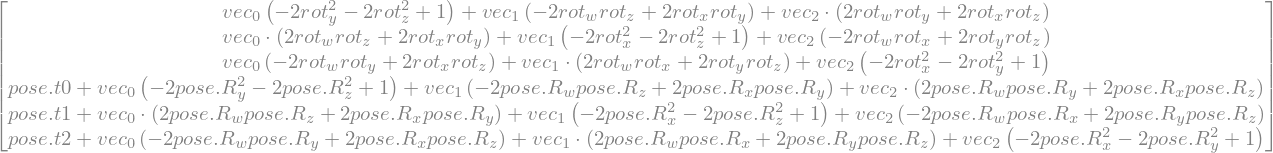

In [68]:
display(residual)

In [69]:
residual_D_tangent = residual.jacobian(lie_vals)

In [70]:
display(residual_D_tangent.shape)

In [71]:
help(sf.Matrix.jacobian)

Help on function jacobian in module symforce.geo.matrix:

jacobian(self, X: '_T.Any', tangent_space: 'bool' = True) -> 'Matrix'
    Compute the jacobian with respect to the tangent space of X if ``tangent_space = True``,
    otherwise returns the jacobian wih respect to the storage elements of X.



In [72]:
lie_vals.tangent_dim()

In [73]:
lie_vals.local_coordinates


<bound method Values.local_coordinates of Values(
  scalar: x,
  rot3: <Rot3 <Q xyzw=[rot_x, rot_y, rot_z, rot_w]>>,
  sub_vals:   Values(
    pose3: <Pose3 R=<Rot3 <Q xyzw=[pose.R_x, pose.R_y, pose.R_z, pose.R_w]>>, t=(pose.t0, pose.t1, pose.t2)>,
    vec: Matrix([
[vec0],
[vec1],
[vec2]]),
  ),
)>

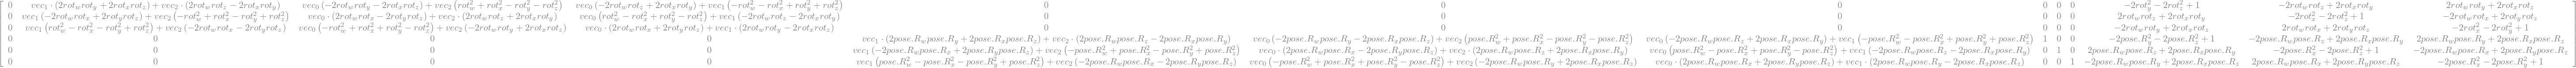

In [74]:
display(residual_D_tangent)